In [215]:
# Importing necessary libraries-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
# Loading the dataset-
df = pd.read_csv('/content/drive/MyDrive/TASK-ML-INTERN.csv')

In [217]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [218]:
df.shape

(500, 450)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [220]:
# Checking missing values-
print("Missing values:")
df.isnull().sum()

Missing values:


,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [221]:
# Replacing missing values of the numerical columns with its median-
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

In [222]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [223]:
# Identify potential outliers using IQR-
for col in df.select_dtypes(include=np.number):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
      print(f"\nPotential outliers in {col}:")
outliers[[col]]


Potential outliers in 15:

Potential outliers in 17:

Potential outliers in 19:

Potential outliers in 20:

Potential outliers in 21:

Potential outliers in 23:

Potential outliers in 24:

Potential outliers in 25:

Potential outliers in 27:

Potential outliers in 28:

Potential outliers in 30:

Potential outliers in 31:

Potential outliers in 32:

Potential outliers in 33:

Potential outliers in 34:

Potential outliers in 35:

Potential outliers in 36:

Potential outliers in 37:

Potential outliers in 38:

Potential outliers in 39:

Potential outliers in 40:

Potential outliers in 41:

Potential outliers in 42:

Potential outliers in 43:

Potential outliers in 44:

Potential outliers in 45:

Potential outliers in 46:

Potential outliers in 47:

Potential outliers in 48:

Potential outliers in 49:

Potential outliers in 50:

Potential outliers in 51:

Potential outliers in 52:

Potential outliers in 53:

Potential outliers in 54:

Potential outliers in 55:

Potential outliers in 56:



,vomitoxin_ppb
11,8900.0
18,4800.0
37,18000.0
38,4300.0
50,5300.0
...,...
455,6700.0
456,6900.0
480,4500.0
481,6100.0


In [224]:
# Separating features and target-
X = df.drop(columns=['vomitoxin_ppb','hsi_id'])
y = df['vomitoxin_ppb']

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

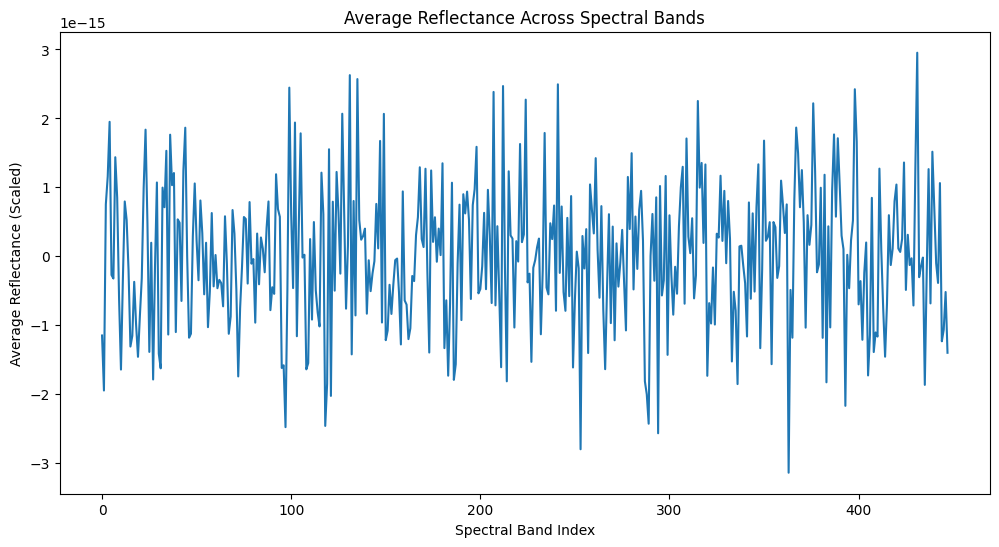

In [227]:
# Visualizing average reflectance for each spectral band-
average_reflectance = np.mean(X_scaled, axis=0)
plt.figure(figsize=(12, 6))
plt.plot(range(len(average_reflectance)), average_reflectance)
plt.xlabel('Spectral Band Index')
plt.ylabel('Average Reflectance (Scaled)')
plt.title('Average Reflectance Across Spectral Bands')
plt.show()

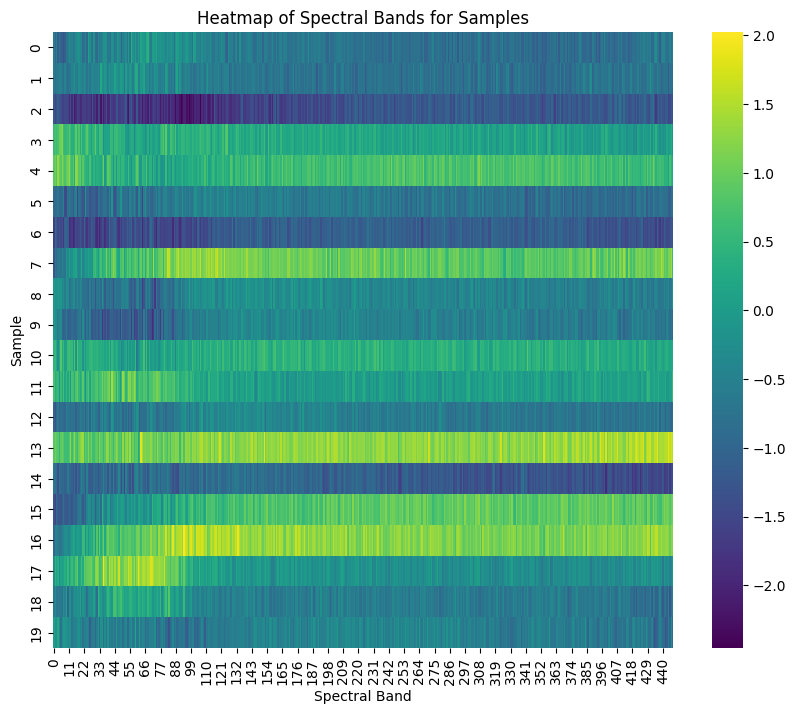

In [228]:
# Visualizing a heatmap comparing samples across spectral bands-
num_samples_to_visualize = 20
subset_data = X_scaled[:num_samples_to_visualize, :]

plt.figure(figsize=(10,8))
sns.heatmap(subset_data, cmap='viridis', annot=False)
plt.xlabel('Spectral Band')
plt.ylabel('Sample')
plt.title('Heatmap of Spectral Bands for Samples')
plt.show()

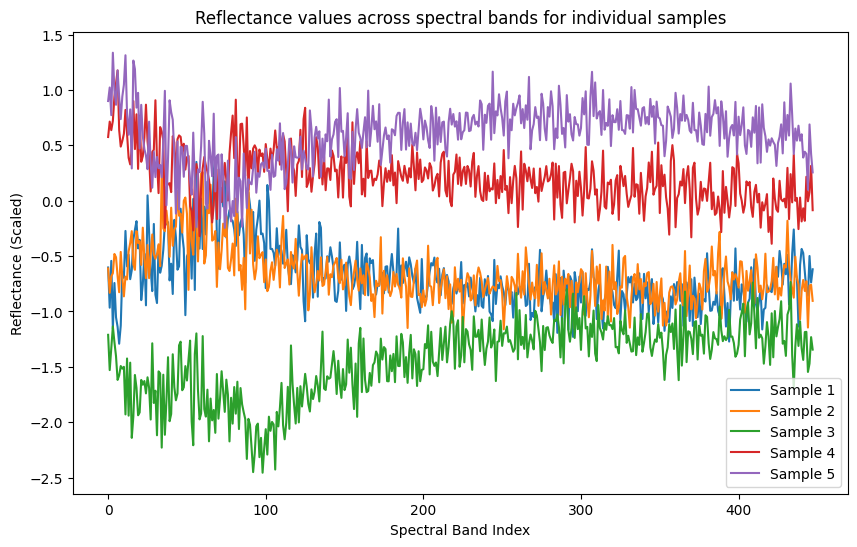

In [200]:
# line plot for individual samples-
plt.figure(figsize=(10,6))
for i in range(5): #Plot the first 5 samples
    plt.plot(range(len(X_scaled[i])), X_scaled[i], label=f"Sample {i+1}")
plt.xlabel("Spectral Band Index")
plt.ylabel("Reflectance (Scaled)")
plt.title("Reflectance values across spectral bands for individual samples")
plt.legend()
plt.show()

In [201]:
from sklearn.decomposition import PCA

In [202]:
# PCA for dimensionality reduction-
pca = PCA(n_components=10)  # Select top 10 components
X_pca = pca.fit_transform(X_scaled)

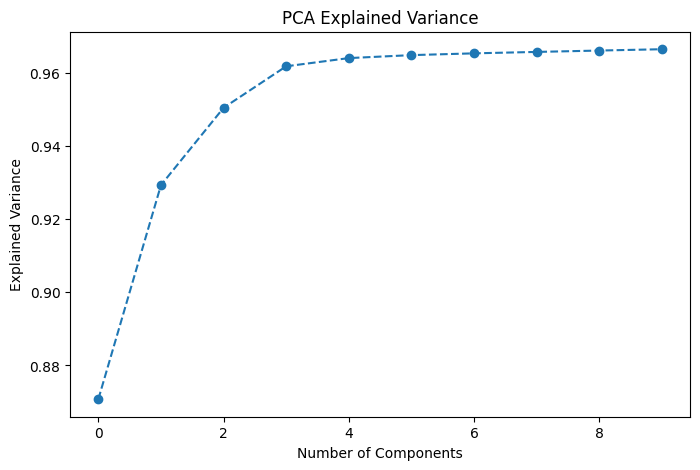

In [203]:
# Variance explained by PCA components-
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

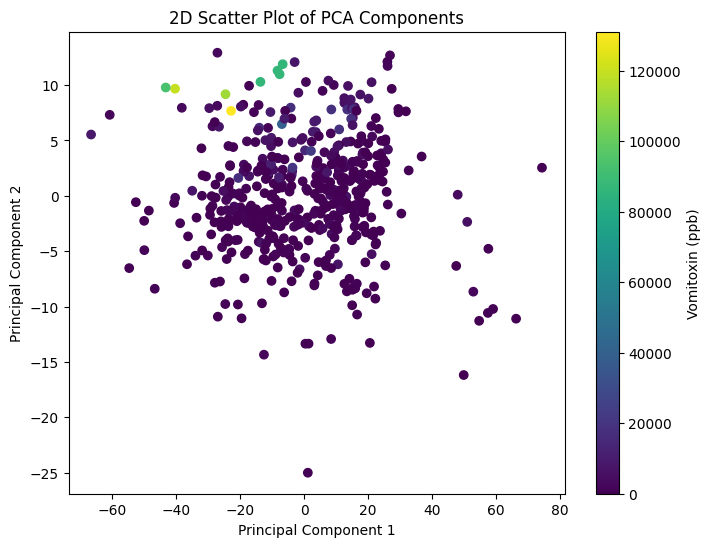

In [204]:
# Visualizing the reduced data-
# 2D scatter plot-
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Color by target variable 'y'
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA Components')
plt.colorbar(label='Vomitoxin (ppb)')
plt.show()

In [205]:
from mpl_toolkits.mplot3d import Axes3D

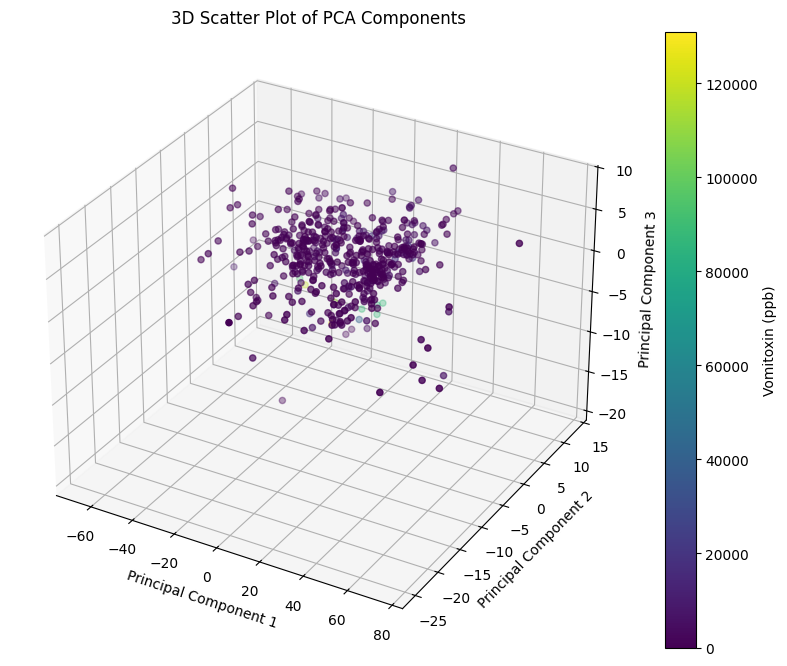

In [206]:
# 3D scatter plot-
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components')
fig.colorbar(ax.collections[0], label='Vomitoxin (ppb)')
plt.show()

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
# Splitting the dataset using train_test_split-
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [209]:
from xgboost import XGBRegressor

# Initializing and training the XGBoost regressor model-
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions on the test set-
y_pred = xgb_model.predict(X_test)

In [210]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [211]:
# Predictions-
y_pred = xgb_model.predict(X_test)

In [212]:
# Model evaluation-
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [213]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 1525.0408073046804
RMSE: 2697.318992244902
R² Score: 0.9739725656547707


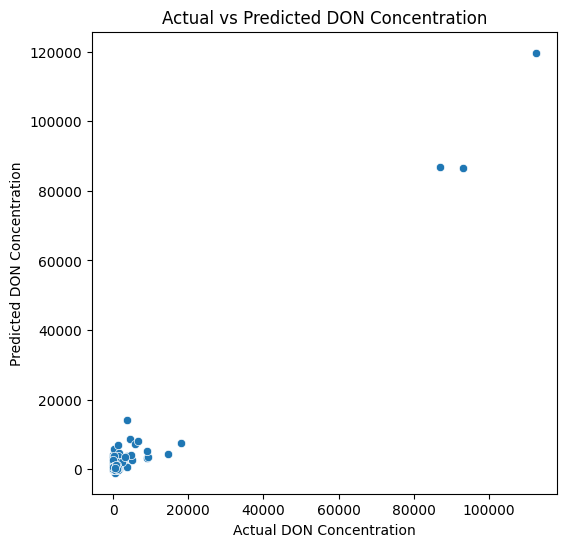

In [214]:
# Scatter plot: actual vs predicted-
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual DON Concentration')
plt.ylabel('Predicted DON Concentration')
plt.title('Actual vs Predicted DON Concentration')
plt.show()

**Model Performance Summary-**

The model applies XGBoost regression after PCA (Principal Component Analysis) on spectral data to predict vomitoxin (DON) concentration. While performance metrics such as MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R² (Coefficient of Determination) are computed, their specific values are:- MAE: 1525.0408073046804,
RMSE: 2697.318992244902,
R² Score: 0.9739725656547707.

**Limitations:**

 Data quality: The model's performance is heavily reliant on the quality of the input data. The code addresses missing values by imputation with the median, but this might not be optimal.Further investigation into data quality and more robust handling of missing values and outliers are crucial.

 Feature engineering: The current feature engineering relies solely on PCA.  Other feature engineering techniques might reveal more informative features. Exploring spectral indices, derivatives, or other domain-specific features could improve predictive accuracy.

 Interpretability: PCA reduces dimensionality but loses interpretability. Understanding the contribution of the original spectral bands to the model's prediction is difficult.

 Generalization: The model's performance on unseen data needs to be evaluated rigorously. A larger, more diverse dataset is required to assess the true generalization ability.


 The model provides a baseline prediction, but further improvements can be achieved by addressing the identified limitations.
